### Modal SNA MAP473D, Ecole Polytechnique, 2019-20

# TP5 - Algorithme de sélection-mutation pour les Chaînes de Markov

## Partie 1. Rappels de cours
### Partie 1.1. Présentation informelle

Pour implémenter un changement de probabilité pour une estimation d'espérance, il faut: 

    a) savoir simuler des variables aléatoires distribuées selon la nouvelle loi,

    b) savoir calculer le ratio de vraisemblance permettant de compenser le changement de probabilité au niveau du résultat final. 

Par exemple, on a vu précédemment que pour calculer $\mathbb{P}(X>a)$ lorsque $X \sim \mathcal{N}(0,1)$, il est plus astucieux de (a) faire un changement de probabilité consistant à passer de la loi $\mathcal{N}(0,1)$ à la loi $\mathcal{N}(\theta_a,1)$ pour un $\theta_a$ bien choisi et (b) compenser ce changement de loi en introduisant le ratio de vraisemblance 
$$
L_{\theta_a}(x)=e^{\theta_a x-\frac{\theta_a^2}{2}}.
$$
Cela corréspond à utiliser l'estimateur
$$
\mathbb{P}(X>a) \approx \frac{1}{n} \sum_{i=1}^n e^{-\theta_a Y_i+\frac{\theta_a^2}{2}}
\mathbb{1}_{Y_i>a},
$$
pour des v.a. $Y_i\sim \mathcal{N}(\theta_a,1)$ indépendantes.

L'**algorithme de sélection/mutation** permet, dans le cadre où l'aléa se modélise avec une chaîne de Markov, d'implémenter des changements de probabilité dans lesquels les étapes (a) et (b) ne posent pas de difficulté. Le prix à payer est une certaine complexité de l'algorithme et un choix de paramètres d'implémentation (les fonctions $G_p$ ci-dessous, qui jouent un rôle analogue au paramètre $\theta_a$ dans  l'exemple gaussien) pas toujours évident et s'appuyant sur une expertise de l'utilisateur.
 
Pour rappel, une *chaîne de Markov* est une suite de v.a.  $(X_0, X_1, X_2, \ldots)$ telle que pour tout $p$, la loi conditionnelle de $X_{p+1}$ sachant la tribu de tout le passé $(X_0, X_1, \dots, X_p)$ jusqu'à l'instant $p$, ne dépend que de la tribu à l'instant $p$.
Par suite, la loi de la chaîne est totalement définie par la donnée de sa loi initiale et d'un noyau de transition $Q$.

Notons $X_{0:n}=(X_0, \ldots, X_n)$ (de façon plus générale, on notera $x_{0:k}$ tout vecteur $(x_0, \cdots, x_k)$). On cherche à calculer

$$\mathbb{E}[f(X_{0:n})]$$

pour une fonction $f$ donnée ; par exemple, $\mathbb{P}(X_{0:n}\in A)$ est un cas particulier lorsque la fonction $f$ est l'indicatrice de l'ensemble $A$. La méthode de Monte Carlo standard consiste à simuler $M$ copies *indépendantes* de la trajectoire $X_{0:n}$ notées $X_{0:n}^{(1)}, \cdots, X_{0:n}^{(M)}$ et à 
 faire la moyenne empirique des valeurs de $f(X_{0:n})$ obtenues $$ \mathbb{E}[f(X_{0:n})] \approx \frac{1}{M} \sum_{m=1}^M f(X_{0:n}^{(m)}).$$ Dans l'algorithme de sélection/mutation, on va aussi simuler $M$ trajectoires et faire une moyenne empirique, mais elles  ne seront plus indépendantes. 
 
 
 __Remarque__. Par rapport à la notation de l'Amphi 4: la longueur de la chaîne est notée $n$ dans ce TP, au lieu de $t$.

Voici une description informelle de l'algorithme :
 
 a) **(Initialisation)**  On simule $M$ v.a. indépendantes de même loi que $X_0$, notées $X_0^{(0,1)}, \ldots, X_0^{(0,M)}$ (si la loi de $X_0$ est $\delta_{x_0}$, tous ces tirages seront évidemment identiques).
    
 b) **(Sélection, itération 1)** On va faire, parmi ces $M$ simulations, une sélection en associant à chaque tirage un poids proportionnel à $G_0(X_0^{(0,m)})$ et en tirant avec remise $M$ points en tenant compte du poids de chacun. La fonction $G_0$ est choisie par l'utilisateur, de sorte à biaiser les tirages dans une direction pertinente pour le problème à résoudre. A l'issue de cette sélection, nous disposons de $M$ nouvelles valeurs initiales, notées $X_0^{(1,m)}$, $1 \leq m \leq M$. 
 
 c) **(Mutation)** Pour chacune de ces valeurs initiales $X_{0}^{(1,m)}$, et de façon indépendante, on simule la valeur de $X_{1}^{(1,m)}$ selon la transition de la chaîne de Markov définie par le noyau $Q$. On dispose donc de  $M$ paires  $(X_{0}^{(1,m)},X_{1}^{(1,m)})$. 
 
 d) **(Sélection, itération 2)** Comme lors de la première sélection, nous n'allons pas forcément toutes les garder, mais faire  $M$ tirages avec remise, tenant compte d'une pondération associée à chaque paire. Cette pondération nécessite de choisir une fonction $(x_0,x_1) \mapsto G_1(x_0,x_1)$.  Nous obtenons à l'issue de cette sélection, $M$ nouvelles paires notées $(X_{0}^{(2,m)},X_{1}^{(2,m)})$.

 e) **(Mutation)** Pour chacun de ces vecteurs, et de façon indépendante, on simule la valeur de $X_{2}^{(2,m)}$ selon la transition de la chaîne de Markov définie par le noyau $Q$.  On obtient $M$ triplets $(X_{0}^{(2,m)},X_{1}^{(2,m)}, X_2^{(2,m)})$, $1 \leq m \leq M$.

f) $\cdots$

y) **(Sélection finale, itération n)** A l'issue de cette étape de sélection, qui exploite une pondération donnée par $(x_0, \cdots, x_{n-1}) \mapsto G_{n-1}(x_0, \cdots, x_{n-1})$, on dispose de $M$ vecteurs de longueur $n$, et notés $(X_{0}^{(n,m)}, \ldots, X_{n-1}^{(n,m)})$ pour  $1 \leq m \leq M$.

z) **(Mutation finale)**  Pour chacun et de façon indépendante, on simule la valeur suivante de la chaîne de Markov selon sa transition définie par le noyau $Q$. On obtient $M$ vecteurs de longueur $n+1$, notés $(X_{0}^{(n,m)}, \ldots, X_{n}^{(n,m)})$ pour  $1 \leq m \leq M$.

Le prix à payer, pour cette torsion de l'aléa, est l'incorporation, dans la moyenne empirique, d'un ratio de vraisemblance un peu complexe : on a

\begin{equation}
\label{eq:KeyFormula}
\mathbb{E} [f(X_{0:n})]\approx
\left( \frac{1}{M}\sum_{m=1}^M \frac{f(X_{0:n}^{(n,m)})}{\prod_{p=1}^{n-1} G_p(X_{0:p}^{(n,m)})}\right)
\times
\left(\prod_{p=1}^{n-1} \frac{1}{M}\sum_{m=1}^M G_p(X_{0:p}^{(p,m)})\right). \qquad \qquad (Eq. 1)
\end{equation}

Par ailleurs, sous certaines hypothèses techniques, la différence entre le membre de droite et le membre de gauche de (Eq. 1), multipliée par $\sqrt{M}$, converge en loi vers une gaussienne. Cela signifie que l'erreur commise dans (Eq. 1) est d'ordre $1/\sqrt{M}$ et qu'elle est gaussienne (donc contrôlable, une fois sa variance estimée, avec les quantiles de la loi gaussienne - ou plus précisément d'une loi de Student (voir Amphi 4)).

### Partie 1.2. Présentation plus rigoureuse

_Rappels_: soit $Q(x, \mathrm{d}y)$ un **noyau de transition** sur un espace  mesurable $(\mathsf{X}, \mathbb{X})$ :  pour tout $x \in \mathsf{X}$, $Q(x, \cdot)$ est une
 loi de probabilité sur $\mathbb{X}$; et pour tout $A \in \mathbb{X}$, $Q(\cdot, A)$ est une application mesurable de $\mathsf{X}$ dans $[0,1]$. 
 
  Une **chaîne de Markov** $\{X_p, p \geq 0 \}$
 définie sur un espace de probabilité $(\Omega, \mathcal{F}, \mathbb{P})$ et à valeur dans
 $\mathsf{X}$ de noyau de transition $Q(x, \mathrm{d}y)$ vérifie : 
 
 1. pour tout $p \geq 0$, la loi de $X_{p+1}$ conditionnellement à $X_{0:p}$ ne dépend que de $X_p$ 
 
 2. cette loi est donnée par 
 $$
 \mathbb{P}\left( X_{p+1} \in A \vert X_p\right) = Q(X_p,A).
 $$
  
On rappelle qu'on cherche à calculer $$\mathbb{E}[f(X_{0:n})]$$ pour une fonction $f$ donnée. 

Pour calculer une telle espérance, l'algorithme suivant permet, dans certains cas, un calcul plus performant que la méthode de  Monte Carlo standard. 
 
- **(Initialisation)** On simule indépendamment $M$ v.a. $X_0^{(0,1)}, \ldots, X_0^{(0,M)}$ à valeur dans $\mathsf{X}$, selon la loi initiale souhaitée. Par exemple, si on veut partir d'un état $x_0$ précis, on pose simplement $X_0^{(0,m)} = x_0$ pour tout $m$.


- **(Itérer)** Pour $p=1, \ldots, n$, étant donnés les $M$ vecteurs courants
  $X_{0:p-1}^{(p-1,1)}, \cdots, X_{0:p-1}^{(p-1,M)}$ de $\mathsf{X}^p$,
  
    - **(Sélection)** On tire $M$ v.a.  $I_1, \ldots, I_M$ indépendantes et identiquement distribuées, à valeur dans   $\{1, \ldots, M\}$ de façon à ce que pour tout  $m \in \{1, \ldots, M\}$,   
$$
\mathbb{P} \left( I_1 = m \right) =\frac{G_{p-1}(X_{0:p-1}^{(p-1,m)})}{ \sum_{\ell=1}^M
  G_{p-1}(X_{0:p-1}^{(p-1,\ell)})}, $$
et on pose pour tout $m \in \{1, \cdots, M \}$
$$
X_{0:p-1}^{(p,m)} = X_{0:p-1}^{(p-1, \, I_m)}.
$$
    - **(Mutation)** Pour tout $m \in \{1, \ldots, M\}$, de façon
  indépendante, on obtient la composante suivante $X_{p}^{(p,m)}$ en tirant une
  v.a.  distribuée selon $Q(X_{p-1}^{(p,m)}, \;\cdot\;)$.


- L'espérance $\mathbb{E}[f(X_{0:n})]$ s'estime alors avec la formule (Eq. 1).


**_Remarque 1_**. Les fonctions de sélection $G_p$ sont choisies par l'utilisateur. Dans le cas $\mathsf{X}=\mathbb{R}$, on pourra prendre

$$G_p(x_{0:p})=e^{\lambda x_p}, \qquad \lambda >0$$

si on veut pondérer favorablement les trajectoires hautes; ou

$$G_p(x_{0:p})=e^{\lambda (x_p-x_{p-1})}, \qquad \lambda >0, $$

si on veut favoriser la sélection de trajectoires croissantes.

**_Remarque 2_**. On a parfois besoin d'estimer une espérance conditionnelle, conditionnellement au fait qu'un événement rare  de type $X_{0:n} \in A$ survienne, c'est-à-dire d'estimer des quantités de type $\mathbb{E}[h(X_{0:n}) | X_{0:n} \in A]$,  où $h$ est une fonction et $ \{X_{0:n} \in A\} $ est un événement rare. Pour cela, on peut écrire

$$\mathbb{E}[h(X_{0:n}) | X_{0:n} \in  A] = \frac{\mathbb{E}[h(X_{0:n}) \mathbb{1}_{ X_{0:n} \in A}]}{\mathbb{P}( X_{0:n} \in A)},
$$
 
estimer le numérateur en utilisant (Eq. 1) avec $f = h \mathbb{1}_{A}$ et estimer le dénominateur en utilisant (Eq. 1) avec $f=\mathbb{1}_{A}$.

## Partie 2. Application

On  fixe $n\geq 1$ et $a$ grand et on cherche à estimer $$\mathbb{P}\left(Z> \frac{a}{\sqrt{n}} \right), \qquad Z \sim  \mathcal{N}(0,1).$$
Nous allons utiliser l'identité
$$
\mathbb{P}\left( Z > \frac{a}{\sqrt{n}} \right) = \mathbb{P} \left(X_n > a \right)
$$
où $X_n \sim \mathcal{N}(0,n)$. Une telle v.a. peut être vue comme issue d'une chaîne de Markov: il suffit de poser pour tout $p \geq 1$,
$$
X_p=\sum_{i=1}^p Y_i,
$$
(et $x_0 = 0$) où $\{Y_i,{i\geq 1}\}$ est une suite de v.a. i.i.d. gaussiennes standard. On peut donc utiliser l'estimateur issu de la formule (Eq. 1) avec $f(x_{0:n})=\mathbb{1}_{x_n>a}$. 

_Bien entendu_, cet exemple est assez artificiel. C'est un cadre de test que nous considérons dans ce TP pour l'algorithme de sélection/mutation. Dans des cas plus concrets, on a souvent des problèmes de simulation de modéles dynamiques, et dans ces cas la chaîne de Markov sera fournie directement par les équations du modèle.
  
$\blacktriangleright$ Pour les fonctions $G_p$, on prendra successivement

1. $G_p(x_{0:p})=e^{\, \lambda_1 (x_p-x_{p-1})}$.

2. $G_p(x_{0:p})=e^{\, \lambda_2 x_p}$.

En général, le choix des constantes $\lambda$ fait partie du problème. Dans ce cadre gaussien, on peut montrer que les constantes optimales sont $\lambda_1 = \frac{a}{n+1}$ et $\lambda_2 = \frac{2a}{n(n-1)}$.

$\blacktriangleright$ Implémenter l'algorithme pour les deux formes du potentiel $G_p$, comparer les résultats avec la formule exacte pour $\mathbb{P} \left(X_n > a \right)$ et avec celle obtenue par une application naïve de la loi des grands nombres.  

$\blacktriangleright$ Afin d'observer la distribution de l'estimateur donné par le terme de droite de l'(Eq. 1), on générera un certain nombre `NbrIter` de réalisations indépendantes de l'estimateur et on affichera ensuite le boxplot (on pourra commencer par `NbrIter = 10` dans le code ci-dessous).

De façon à avoir des programmes qui s'exécutent assez vite, on pourra prendre $n=20$, $M=10^4$ et $a=4\sqrt{n}$.

#### Quelques indications au niveu du code

+ Afin d'obtenir les tirages des indices $I_m$ selon la loi souhaitée: on pourra utiliser la fonction `numpy.random.choice(a, size = N, replace = True, p = [p_1,..., p_n])`, qui génère `N` tirages indépendants (argument `replace = True` activé par défaut) suivant la loi `[p_1,..., p_n]` (argument `p`, par défaut la loi uniforme) sur l'espace d'états `a = [a_1, ..., a_n]`.
Voir la [documentation officielle](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html) de la fonction pour plus de détails.


+ Le calcul de la constante  $\prod_{p=1}^{n-1} \int G_p \, d\eta^M_p$ dans l'(Eq. 1) a été discuté dans l'Amphi 4: il n'est pas nécessaire de stocker tous les termes qui interviennent dans le produit, il suffira de mettre à jour le produit courant $C_k = \prod_{p=1}^{k} \int G_p \, d\eta^M_p$ à partir de la valeur $C_{k-1}$ à l'intérieur d'une boucle sur la valeur de $p$.


+ Afin de simplifier le calcul du dénominateur $\prod_{p=1}^{n-1} G_p( X^{n,m}_{0:p})$ dans l'(Eq. 1), on pourra remarquer que l'on a
$$
\prod_{p=1}^{n-1} G_p( X^{n,m}_{0:p}) = \exp \bigl(\lambda \, X^{n,m}_{n-1} \bigr)
$$
dans le cas favorisant les trajectoires croissantes $G_p(x_{0:p}) = e^{\, \lambda(x_{p} - x_{p - 1})}$ (car $x = 0$), et 
$$
\prod_{p=1}^{n-1} G_p( X^{n,m}_{0:p}) = \exp \Bigl( \lambda \sum_{p=1}^{n-1} X^{n,m}_p \Bigr)
$$
dans le cas favorisant les trajectoires hautes $G_p(x_{0:p}) = e^{\, \lambda x_{p} }$. Dans ce deuxième cas, il faudra stocker toutes les $M$ copies de la trajectoire $(X^{n}_1, \dots, X^{n}_{n-1})$ de la chaine obtenue à la dernière étape de l'algorithme.

---------------------------------------------
La vraie valeur de la probabilite est 3.17e-05
Calcul du nouvel estimateur numero 1
Calcul du nouvel estimateur numero 2
Calcul du nouvel estimateur numero 3
Calcul du nouvel estimateur numero 4
Calcul du nouvel estimateur numero 5
Calcul du nouvel estimateur numero 6
Calcul du nouvel estimateur numero 7
Calcul du nouvel estimateur numero 8
Calcul du nouvel estimateur numero 9
Calcul du nouvel estimateur numero 10


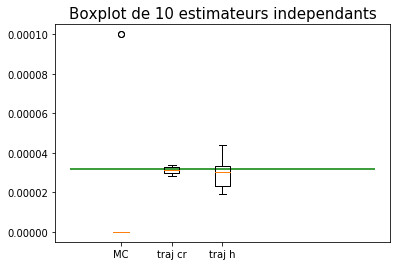

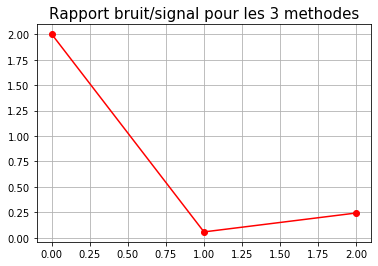

In [37]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

#########################
# Parametres du problème
#########################
# horizon temporel
n = 20
# nombre de particules a chaque iteration
M = int(1E4)
#  definition du seuil
c = 4.0
a = c*np.sqrt(n)

####################
# Valeur theorique
####################
print("-" * 45)
print("La vraie valeur de la probabilite est %1.2e" %sps.norm.cdf(-c))

############################################
# Boucle sur le nombre de realisations 
# independantes de l'estimateur, pour M fixé
############################################
NbrIter = 10

# La variable Stock est utilisée pour stocker les tirages des différents
# estimateurs. Il y a trois colonnes, car nous simulons trois estimateurs:
# + un Monte Carlo naif avec M points,
# + l'algo de selection-mutation avec selection haute, 
# + l'algo de selection-mutation avec selection croissante.

Stock = np.zeros((NbrIter, 3))

for nn in range(NbrIter):
    # Pour patienter pendant la boucle qui genère les NbrIter estimateurs indep
    print("Calcul du nouvel estimateur numero "+str(nn+1))
    
    # Tirages de M x n v.a. N(0,1), qui seront utilisees dans toutes les methodes
    Y = np.random.randn(M, n)
    
    ###############################
    # Methode Monte Carlo naive
    ###############################
    
    ## TO DO ##
   
    # Stockage des NbrIter estimateurs MC
    Stock[nn, 0] = (Y.sum(axis=1) > a).mean()
    
    ###########################################################################################
    # En ponderant les trajectoires croissantes : Estimation via G(X) = e^{la (X_p-X_{p-1}) }
    ###########################################################################################
    # Rque: le calcul de ces poids necessite de garder en memoire l'instant courant
    # et le premier passé
    
    # parametre des poids G_p
    la = float(a)/(n+1)
    
    # X stocke les deux dernières valeurs pour chacune des M chaines, dans l'optique du calcul de G_p 
    # Initialisation de X : X0 = 0 et X1 suit une loi N(0,1)
    X = np.array( [np.zeros(M), Y[:,0]] )
    
    # Ici on propose de transposer l'array X, car on préfère penser à X comme à un array
    # avec deux colonnes au lieu de deux lignes: mais ce n'est qu'un choix cosmétique,
    # vous pouvez garder l'array X tel quel.
    # X = X.T
    deuxieme_terme = 1
    
    for p in range(1, n):
        ## TO DO: construire l'estimateur par selection-mutation
        G = np.exp(la * (X[1] - X[0]))
        deuxieme_terme *= G.mean()
        # Selection:
        indices = np.random.choice(np.arange(M), size=M, p=G / G.sum())
        # Mutation
        X = np.array([X[1][indices], X[1][indices] + Y[:, p]])
    premier_terme = ((X[1] > a) / np.exp(la * X[0])).mean()

    # Stockage des NbrIter estimateurs
    Stock[nn, 1] =  premier_terme * deuxieme_terme#??
    
    ###############################################################################
    ## En ponderant les trajectoires hautes : Estimation via G(X)=e^{alpha X_p}
    ###############################################################################
    la = 2*float(a)/(n*(n-1))
    F = Y[:, 0]
    normal_terme = np.exp(la * F)
    deuxieme_terme = 1
    for p in range(1, n):
        ## TO DO: construire l'estimateur par selection-mutation
        G = np.exp(la * F)
        deuxieme_terme *= G.mean()
        # Selection:
        indices = np.random.choice(np.arange(M), size=M, p=G / G.sum())
        # Mutation
        F = F[indices] + Y[:, p]
        normal_terme = normal_terme[indices] * np.exp(la * F)
    normal_terme /= np.exp(la * F)
    premier_terme = ((F > a) / normal_terme).mean()
    
    # Stockage des NbrIter estimateurs
    Stock[nn, 2] = premier_terme * deuxieme_terme
    

#######################
## Affichages proposés
#######################

# Comparer les boxplots des échantillons de taille NbrIter obtenus 
# pour les 3 estimateurs

plt.close(1)   
plt.figure(1)

plt.title("Boxplot de " + str(NbrIter) +" estimateurs independants", fontsize=15)
plt.boxplot(Stock[:, 0:3], positions=[1,2,3],
            labels = ['MC','traj cr','traj h'])
plt.hlines(sps.norm.cdf(-c), xmin=0, xmax=6, color='g')

# Comparer les 3 estimateurs par le ratio "ecart-type / valeur moyenne", 
# calculé sur les échantillons de taille NbrIter
plt.close(2)
plt.figure(2)

mean_stock = np.mean(Stock, axis=0)

st_dev = np.std(Stock, axis=0)

plt.plot(st_dev/mean_stock,'r-o')
plt.title("Rapport bruit/signal pour les 3 methodes", fontsize=15)
plt.grid()